# Chapter 13. Convolutional Neural Networks

#### - 과거, 컴퓨터는 계산적인 측면에서 큰 발전을 이루었지만 사소한 일(사진에서 강아지 찾기, 대화 인식 등)을 처리하지 못했었음 
#### - 무엇인가를 '인식' 하는 '지각'은 주로 의식 영역 밖에서 발생 
- 감각 정보가 의식에 도달했을 때는 이미 높은 수준의 특징들이 더해진 상태 
- 인식을 부정하기는 어려우며, 인식한 방법에 대한 설명도 어려움 
- 지각은 사소한 것이 아니므로 지각을 구현하기 위해서는 감각이 어떻게 작동하는지 알아야 함

### * CNNs (Convolutional Neural Networks)
#### - 뇌의 시각피질 연구에서 시작되어 1980년대 부터 이미지 인식에 사용되어 옴 
#### - 기술의 발전으로 CNN은 복잡한 시각적 지각 뿐 아니라 음성인식, 자연어처리 등에도 성공적으로 작동함 
#### - 이번 장에서는 
- CNN의 기원 
- CNN의 구성요소 
- Tensorflow에서의 CNN 구현 
- 성능이 좋은 CNN의 여러 구조들 

## 1. The Architecture of the Visual Cortex 
### 동물 실험을 통해 시각피질에 대한 중요 통찰력을 얻음 

<img src = "image\ch13\visual.png">

#### - 시각 피질의 많은 뉴런들은 작은 수용영역을 가짐 
(파란색 원)
- 수용영역은 시각 영역에서 한정된 영역의 시각적 자극에만 반응 
- 수용영역은 서로 겹칠 수 있음 
- 수용영역을 모두 모으면 전체 시각 영역을 둘러쌀 수 있음 

#### - 뉴런마다 반응하는 특정 방향이 있을 수 있음 
- 특정 뉴런들은 수평 선의 영상에만 반응, 다른 특정 뉴런들은 다른 방향(orientation)에만 반응 
    - 같은 수용역역을 가지는 두 뉴런이라도 다른 방향의 영상에만 반응할 수 있음 

#### - 뉴런마다 수용영역의 크기가 다를 수 있음 
- 몇몇 뉴런은 수용영역이 더 크고, 더 복잡한 패턴(낮은 레벨의 패턴이 조합된)에 반응함 
- 고차원의 뉴런은 주변의 저차원의 뉴런들의 출력에 기초함 

(각 뉴런은 전 계층에서 몇몇의 뉴런과만 연결되어 있음)

<img src = "image\ch13\visual.png">

#### - 이러한 강력한 구조는 모든 영역에서 모든 종류의 복잡한 패턴을 감지할 수 있게 해줌 


### 시각피질에 대한 연구는 현재 CNN으로 발전한 신인식기(neocognitron)에 영감을 줌 
#### - 1998년, LeNet-5 등장 
- 손으로 쓴 숫자를 인식하는데에 주로 사용 
- fully connected 레이어, 시그모이드 활성화 함수뿐 아니라 convolutional 레이어, pooling 레이어의 구성요소 도입 

### 왜 영상인식에 간단하게 기존 DNN을 사용하지 않는가?
#### - fully connected DNN
- 작은 이미지(MNIST)에는 잘 동작
- 큰 이미지(많은 파라미터가 필요)에는 분해가 됨 
- 이미지는 input값이 크기 때문에, 그 만큼 노드도 많이 필요하고, fully connected하게 되면 연결의 수가 굉장히 많아짐 
- 그러므로 cnn은 부분연결을 통해 이 문제를 해결 

## 2. CNN's Building Block

## 1) Convolutional Layer
- CNN에서 가장 중요한 구성요소 

#### - 첫번째 convolutional layer
- 입력 영상의 모든 픽셀에 연결되지 않음 
- 해당 수용역역의 픽셀에만 연결 

#### - 두번째 convolutioanl layer
- 첫번째 convolutional 레이어에서 작은 사각형 내에 속하는 뉴런과만 연결 

<img src = "image\ch13\cnn.png">

#### - 즉 
- 첫번째 은닉계층에서는 낮은 차원의 특징에 집중하도록하고 
- 두번째 은닉계층에서는 그 특징들을 높은 차원의 특징으로 결합시킴  
- 이러한 계층적 구조는 보통 실생활 영상의 구조
    - 그러므로 같은 구조를 사용하는 CNN이 영상 인식에 잘 작동할 수 있음 
    

### ※ 
- 지금까지 봐온 다층 인공 신경망에서, 각 레이어는 긴 한 줄의 뉴런으로 구성되어 있었음 
- 입력되는 영상(2D)를 1차원으로 바꿔야 했었음 
- 이제부터, 각 레이어는 2차원을 표현하여 대응되는 입력값에 뉴런들이 더 잘 매치되도록 

### 작동원리 
 
#### - (i, j)에 위치한 뉴런은 그 전 레이어에서 (i ~ i+fh-1, j ~ j+fw-1)에 위치하는 뉴런으로부터 출력값을 얻음 
- fh, fw : 수용역역의 높이, 넓이 
    
#### - 그 전 레이어와 같은 크기(높이, 넓이)를 가지기 위해서는 입력값 주변에 0으로 감싸야 함 -> zero padding

<img src = "image\ch13\zero.png">

#### - 수용역역 간에 보폭(stride)를 줄 수 있음 
- 큰 입력 레이어를 더 작은 크기의 레이어와 연결 가능 
- 보폭은 행, 렬이 같을 수도 있고 다를 수도 있음 

<img src = "image\ch13\zero2.png">
- 입력 레이어 : 5x7 (zero padding 사용)
- 3x3 수용영역, 보폭 2 사용 
- 다음 레이어 : 3x4
- (i, j)에 위치한 뉴런은 그 전 레이어에서 (ixsh ~ ixsh+fh-1, jxsw ~ jxsw+fw-1)에 위치하는 뉴런으로부터 출력값을 얻음
- sh, sw : 수직, 수평 보폭 


## Filter
- (= convolutional kernel)
- 뉴런의 가중치를 수용영역과 크기가 같은 작은 영상으로 표현 

#### - Vertical Filter 
- 7x7
- 중앙의 수직은 1(흰색), 나머지는 0(검은색)으로 채워짐
- 이러한 가중치를 사용하면 중앙의 수직을 제외하고는 모두 무시됨 (곱하기 0)

#### - Horizontal Filter
- 7x7
- 중앙의 수평은 1(흰색), 나머지는 0(검은색)으로 채워짐 
- 이러한 가중치를 사용하면 중앙의 수평을 제외하고는 모두 무시됨 (곱하기 0)

<img src = "image\ch13\filter.png">

### - 예시
#### - Vertical Filter 사용 
- 왼쪽 위 영상 
- 영상에서 필터 영역의 수직 부분만 강조되고 나머지는 흐려짐

#### - Horizontal Filter 사용 
- 오른쪽 위 영상
- 영상에서 필터 영역의 수평 부분만 강조되고 나머지는 흐려짐 

### 같은 필터를 사용한 뉴런으로 가득찬 레이어는 특징 맵(feature map)을 제공함 
#### - 특징 맵 
- : 필터와 가장 유사한 영역이 가중된 영상
- 학습 동안 CNNs은 가장 유용한 필터를 발견하고, 그것을 더 복잡한 패턴으로 결합하는 것을 학습


(<matplotlib.axes._subplots.AxesSubplot at 0x26fcf9163c8>,
 <matplotlib.image.AxesImage at 0x26fd232d780>)

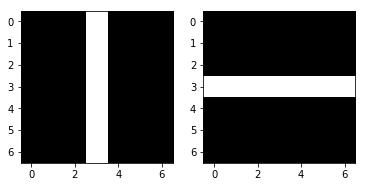

In [1]:
from sklearn.datasets import load_sample_image
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

#이미지 데이터 설정하기 
china = load_sample_image('china.jpg')
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

 
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1 #수직필터
fmap[3, :, 0, 1] = 1 #수평필터 

plt.subplot(121), plt.imshow(fmap[:, :, 0, 0], cmap='gray', interpolation='nearest')
plt.subplot(122), plt.imshow(fmap[:, :, 0, 1], cmap='gray', interpolation='nearest')

(<matplotlib.axes._subplots.AxesSubplot at 0x26fd64d8cc0>,
 <matplotlib.image.AxesImage at 0x26fd7584a90>)

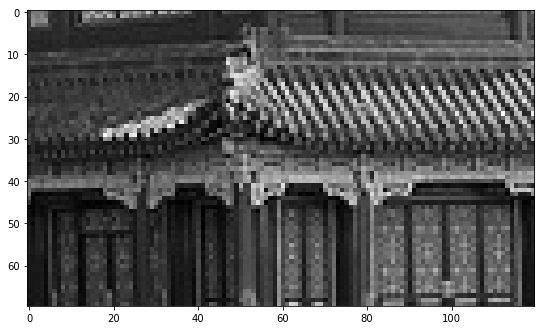

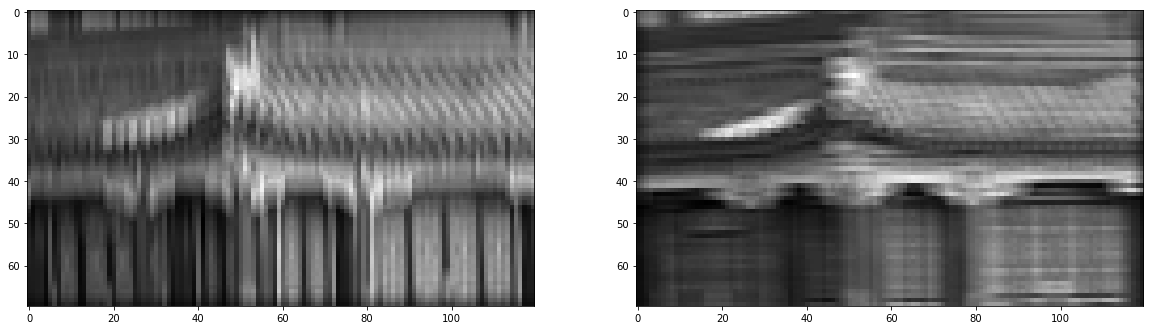

In [2]:
import tensorflow as tf 

plt.figure(figsize=(20, 30))
#처리할 이미지 
plt.subplot(221), plt.imshow(images[0, :, :, 0], cmap='gray', interpolation='nearest')

#그래프 생성 
X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1, 1, 1, 1], padding="SAME")

#실행 
with tf.Session() as sess :
    output = convolution.eval(feed_dict={X : images})

    
plt.figure(figsize=(20, 30))
#수직필터
plt.subplot(223), plt.imshow(output[0, :, :, 0], cmap='gray', interpolation='nearest')
#수평필터 
plt.subplot(224), plt.imshow(output[0, :, :, 1], cmap='gray', interpolation='nearest')

## Stacking Multiple Feature Maps
### 실제 Convolutional Layer는 같은 크기를 가진 여러개의 특징맵으로 구성되어 있음 (3차원)
- 같은 특징맵 내에서는 같은 파라미터를 공유 
- 다른 특징맵끼리는 다른 파라미터를 사용 
- 뉴런의 수용영역이 모든 이전단계에서 생성된 모든 특징맵에 걸쳐 확장됨 
- convolutional 레이어는 일제히 여러 필터를 입력값에 적용하여, 어디서든 입력 위치의 여러 형상을 감지할 수 있음 

### ※
- 하나의 특징맵 내에서는 같은 파라미터를 공유하기 때문에 모델의 파라미터 개수는 적어짐 
- 이것은 CNN이 한 구역에서의 패턴인식을 학습하면, 어느 구역에서도 그 패턴을 인식할 수 있음을 의미함 
- 반면, DNN은 한 구역에서의 패턴인식을 학습하면, 그 구역에서만 패턴을 인식할 수 있음  

### input 영상은 여러개의 서브레이어로 구성됨 
#### -  color channel
- 보통 3개 : Red, Green, Blue
- 그레이스케일 영상은 1개를 가짐 
- 위성 영상들은 더 많은 개수를 가짐 

<img src = "image\ch13\clayer.png">

### 위치는 같지만 다른 특징맵에 존재하는 뉴런들은 서로 같은 위치의 출력에 존재함 

- l 레이어의 k번째 특징맵 
    - (i, j)에 위치하는 뉴런
    
    
- l-1 레이어에서
    - (i*보폭 ~ i*보폭+수용영역넓이-1, j*보폭 ~ j*보폭+수용영역높이-1)의 출력값 
    
 
### 공식 
#### - l레이어의 k번째 특징맵의 (i, j)에 위치한 뉴런의 출력값 
<img src = "image\ch13\cl.png">

- sh, sw : 수직, 수평 보폭
- fh, fw : 수용영역
- fn' : 이전 레이어(l-1)의 특징맵 개수 
- x i',j',k' : 이전 레이어(l-1)의 k'번째 특징맵의 (i', j')에 위치한 뉴런의 출력값 
- bk : l레이어의 k번째 특징맵의 bias term으로, k번째 특징맵의 전체적인 밝기를 조정하는 역할 
- w u,v,k',k : l레이어의 k번째 특징맵에 존재하는 뉴런들의 연결 가중치, (u, v)에 위치한 입력값, k'번째의 특징맵 

## TensorFlow Implementation 
### 텐서플로우에서 각 입력 영상은 보통 3D 형태의 텐서로 표현 
- [높이, 넓이, 채널] 

### Mini batch는 4D 형태의 텐서로 표현 
- [mini-batch 크기, 높이, 넓이, 채널] 

### Convolutional 레이어의 가중치 4D 형태의 텐서로 표현 
- [수용영역 높이, 수용영역 넓이, fn, 특징맵의 수] 

### Convolutional 레이어의 bias term은 간단하게 1D 형태의 텐서로 표현 
- [fn] 

#### - 예제
- Sickit-learn의 load_sample_images()로 불러온 두 개의 영상 --> china, flower
- 7x7 크기의 필터 2개 생성 (수직, 수평필터)
- tensorflow의 conv2d() 메소드를 사용해 convolutional 레이어를 생성하고 필터들 적용 
- 최종적으로, 특징맵이 생성됨 

(<matplotlib.axes._subplots.AxesSubplot at 0x26fd7f1bb38>,
 <matplotlib.image.AxesImage at 0x26fd7fbc2e8>)

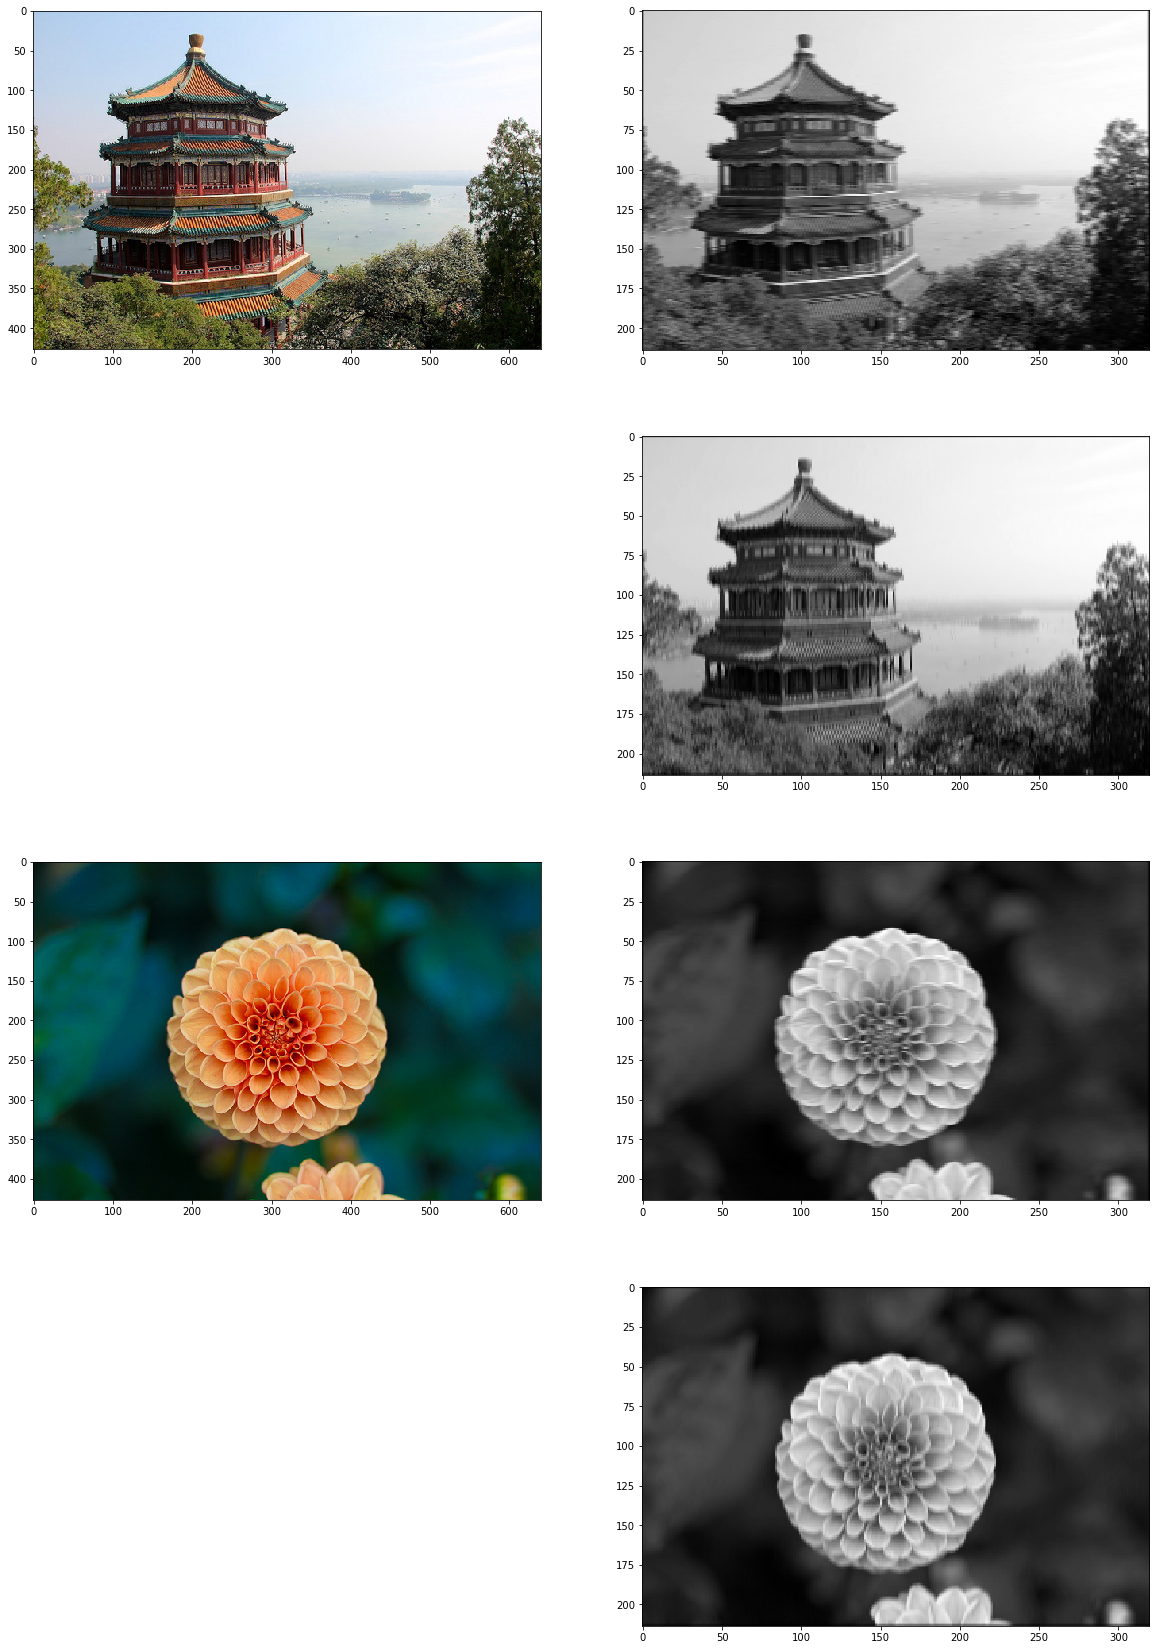

In [3]:
#데이터 만들기  
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32) 

batch_size, height, width, channels = dataset.shape
#china.shape : (427, 640, 3)
#flower.shape : (427, 640, 3)
#dataset.shape : (2, 427, 640, 3)

#필터 만들기 (2개)
##filters는 적용할 필터들의 집합(set)
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 #수직필터 (0)
filters[3, :, :, 1] = 1 #수평필터 (1)

#그래프 만들기 
#input X 와 필터 2개를 적용한 convolutional레이어 
##X는 입력 mini-batch : 4D형태의 텐서 
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))

##strides는 4개의 요소를 가진 1차원 배열, 가운데 2개의 요소는 수직, 수평 보폭(sh, sw),
##양 끝의 2개의 요소는 현재 반드시 1, 나중에 batch의 보폭과 채널의 보폭을 지정할 때 사용
##padding은 VALID 또는 SAME
##padding="VALID" : zero padding을 사용하지 않음, 보폭에 따라 입력 영상의 아래쪽 행과 오른쪽 열을 무시할 수 있음 
##padding="SAME" : zero padding을 사용함 
convolution = tf.nn.conv2d(X, filters, strides=[1, 2, 2, 1], padding="SAME")

#실행 
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X : dataset})

#imshow
plt.figure(figsize=(20, 30))
plt.subplot(421), plt.imshow(china)
plt.subplot(422), plt.imshow(output[0, :, :, 1], cmap='gray') #수평필터
plt.subplot(424), plt.imshow(output[0, :, :, 0], cmap='gray') #수직필터
plt.subplot(425), plt.imshow(flower)
plt.subplot(426), plt.imshow(output[1, :, :, 1], cmap='gray') #수평필터
plt.subplot(428), plt.imshow(output[1, :, :, 0], cmap='gray') #수직필터 

### - Padding Options
- 입력 영상을 1D로 간주, 필터의 넓이는 6이고 보폭은 5
<img src = "image\ch13\padding.png">


## Convolutional 레이어의 하이퍼파라미터 
- Convolutional 레이어에는 몇몇개의 파라미터가 존재함 
    - 필터의 개수
    - 필터의 높이와 넓이 
    - padding 사용 여부 


- cross validation을 사용하여 최적의 하이퍼파라미터 값을 찾을 수 있지만 이것은 많은 시간이 걸림 
- 뒤에서 CNN 구조에 대해 설명할 때, 실행에 있어 어떤 하이퍼파라미터 값이 최적인지를 알 수 있는 아이디어를 주겠다 

## Memory Requirements

### Convolutional 레이어는 많은 양의 RAM을 필요로 함 
- 특히 학습 시 많은 양의 메모리가 필요함 
    - 오차 역전파 시에 정방향에서 계산된 값들이 바로 필요하기 때문
    
    
- DNN보다는 훨씬 적은 연산이지만 그래도 많은 RAM 메모리가 요구됨 
    - 정방향 연산의 값이 역방향 연산을 위해 보존되야 함 
    
### ※ 
- 메모리 부족 오류 해결 방법 
    - mini batch의 크기를 줄인다 
    - 보폭이나 레이어 삭제를 통해 차원의 수를 줄인다 
    - 32bit float형 대신 16bit float형을 사용한다 
    - 여러 장치에 걸쳐 CNN을 분산한다
    

## 2) Pooling Layer

### pooling  레이어의  목적은 입력 영상을 축소(subsampling)하는 것 
- 계산 과정, 메모리 사용량, 파라미터의 개수를 줄이기 위해 
- overfitting의 위험을 제한할 수 있음 
- 또한 인공신경망이 영상의 작은 이동에도 견딜 수 있게 함 

### pooling 레이어 또한  이전 레이어의 작은 사각형 수용영역 내에 위치하는 제한된 뉴런과만 연결 
- 마찬가지로 반드시 수용영역의 크기, 보폭, padding 여부 지정 필요 

### pooling 레이어는 가중치가 없음 
- 단지 집합함수(max, mean)를 사용하여 입력값을 결합하는 작업을 함 
- 예시 

<img src = "image\ch13\maxpooling.png">
    - 가장 보편적인 max pooling 레이어 
    - 2x2의 pooling 커널, 보폭 2, padding 사용하지 않음 
    - 각 커널의 최대값만 다음 레이어의 입력값으로 들어가고 나머지는 버림 

### 파괴적인 종류의 층 
- 작은 크기인 2x2의 커널과 보폭 2를 가졌을뿐인데 출력 영상은 입력 영상보다 4배(행 2배, 열 2배) 작은 크기를 가짐 
- 입력값의 75%를 버림 

### pooling 레이어는 각각의 채널에서 독립적으로 작동 
- 출력의 깊이는 입력의 깊이와 동일함 
- 영상의 높이와 넓이는 바꾸지 않고 채널의 수를 감소시켜 깊이 차원을 

### pooling 레이어 구현 
#### - 예제 
- 2x2 크기, 보폭 2, padding 사용 안하는 max pooling 커널을 영상에 적용 

(<matplotlib.axes._subplots.AxesSubplot at 0x26fd810bfd0>,
 <matplotlib.image.AxesImage at 0x26fd7846198>)

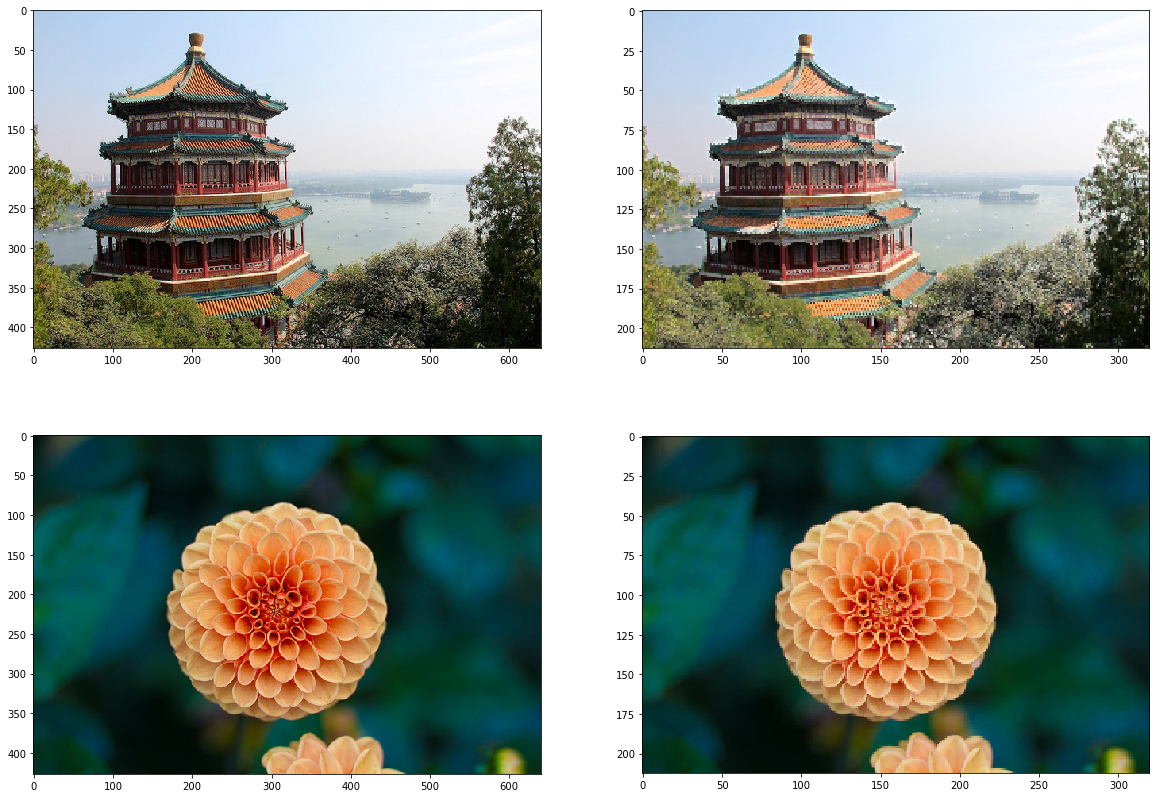

In [4]:
#데이터 만들기  
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32) 

batch_size, height, width, channels = dataset.shape
#china.shape : (427, 640, 3)
#flower.shape : (427, 640, 3)
#dataset.shape : (2, 427, 640, 3)


#그래프 만들기 
#input X 와 max pooling 
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))

#2x2커널, 2x2 보폭, zero padding X
##ksize : 4개의 차원에 대한 커널 형태를 가짐, [batch크기, 높이, 넓이, 채널 수]
##현재 Tensorflow에서는 여러 데이터에 대한 pooling over를 지원하지 않음, 그러므로 ksize의 첫번째 요소는 반드시 1이 되어야 함 
##또한 공간차원(높이, 넓이)과 깊이차원 대한 pooling over를 둘 다 지원하지 않음, 
##그러므로 반드시 ksize의 두번째, 세번째 요소가 1이거나 마지막 요소가 1이어야 함  
max_pool = tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID") 


#실행 
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X : dataset})
    
    
#imshow
plt.figure(figsize=(20, 30))
plt.subplot(421), plt.imshow(china)
plt.subplot(422), plt.imshow(output[0].astype(np.uint8))
plt.subplot(423), plt.imshow(flower)
plt.subplot(424), plt.imshow(output[1].astype(np.uint8))


#밝기가 밝아짐 (최대값들만 사용)

#### - 예제 
- average pooling 레이어 
- 마찬가지로 2x2 크기, 보폭 2, padding 사용하지 않는 커널 

(<matplotlib.axes._subplots.AxesSubplot at 0x26fd765c128>,
 <matplotlib.image.AxesImage at 0x26fd77330f0>)

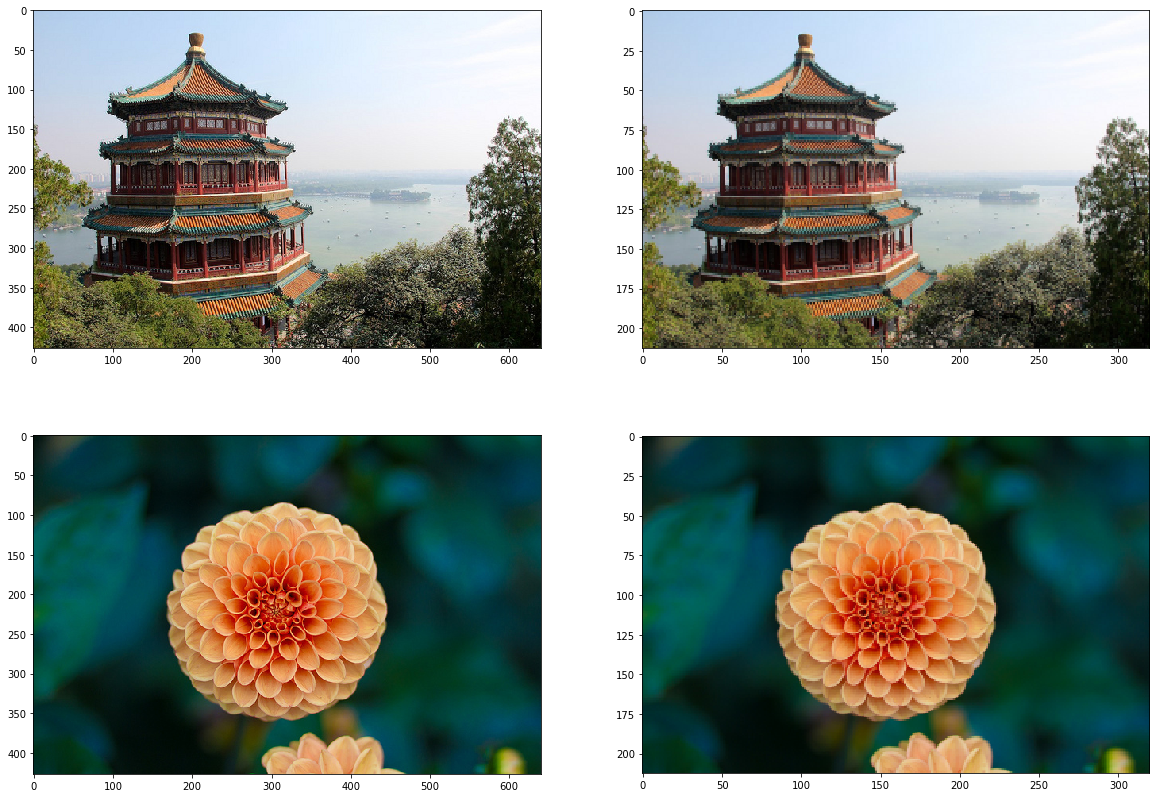

In [5]:
#데이터 만들기  
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32) 

batch_size, height, width, channels = dataset.shape
#china.shape : (427, 640, 3)
#flower.shape : (427, 640, 3)
#dataset.shape : (2, 427, 640, 3)


#그래프 만들기 
#input X 와 max pooling 
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))

#2x2커널, 2x2 보폭, zero padding X
avg_pool = tf.nn.avg_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID") 


#실행 
with tf.Session() as sess:
    output = sess.run(avg_pool, feed_dict={X : dataset})
    
    
#imshow
plt.figure(figsize=(20, 30))
plt.subplot(421), plt.imshow(china)
plt.subplot(422), plt.imshow(output[0].astype(np.uint8))
plt.subplot(423), plt.imshow(flower)
plt.subplot(424), plt.imshow(output[1].astype(np.uint8))

## 3. CNN Architectures

### 일반적인 CNN의 구조 
- 몇 개의 convolutional 레이어 + 한개의 pooling 레이어 + 몇 개의 convolutional 레이어 ... 가 쌓인 구조 
- 과정이 지날수록 영상의 크기는 점점 작아지지만 깊이는 점점 깊어짐 
- 쌓인 구조의 가장 위에는 fully connected 레이어로 구성된 feedforward 신경망이 추가되고 최종 레이어의 출력값은 예측값
<img src = "image\ch13\cnna.png">

### CNN 구조의 발전 
- 지난 몇년 간 기본적인 CNN 구조의 변형에 대한 발전은 이 분야의 놀라운 발전을 이끔 
- 대표적인 CNN 구조에 대해 살펴보자 

## 1) LeNet-5
- 가장 유명한 CNN 구조 
- 1998년 등장 
- 손으로 쓴 숫자 데이터(MNIST)를 인식하는데에 많이 사용 

### 구조 
<img src = "image\ch13\lenet.png">

- MNIST 영상은 28x28 픽셀, zero padding을 사용했기 때문에 입력 영상은 32x32 픽셀 
    - 신경망에 적용 전에 정규화 진행 
    - 나머지 네트워크(레이어)에서는 padding을 사용하지 않기 때문에 과정을 거칠수록 영상의 크기가 점점 감소함 
    
    
- average pooling 레이어 사용 
    - average pooling 레이어는 살짝 더 복잡함 
    - 각각의 뉴런은 입력값의 평균을 계산, 각 맵에 대한 학습된 계수를 곱하고, 각 맵에 대한 학습된 bias term을 더하고, 활성화 함수를 적용
    
    
- C3 레이어의 대부분의 뉴런은 S2레이어의 전체 맵이 아닌 3 ~ 4개의 맵들의 뉴런들과만 연결
    <img src = "image\ch13\lenet2.png">
    - 선택적으로 골라 연결 
    
    
- 출력 레이어는 조금 특별 
    - 입력과 가중치 벡터의 행렬곱을 계산하는 대신 입력벡터와 가중치벡터간의 유클라디안 거리의 제곱 
    - 각각의 출력은 이미지가 숫자 클래스(0~9)에 얼마나 속하는지 측정 
    
    
    
## 2) AlexNet
- 2012년 2등과 큰 격차로 ImageNet ILSVRC대회에서 우승한 CNN 구조 
- LeNet-5과 비슷하지만 좀 더 크고 깊은 구조 
- 처음으로 convolutional 레이어 사이에 pooling 레이어를 쌓지 않고 convolutional 레이어를 직접적으로 서로 겹쳐 쌓은 구조 

### 구조 
<img src = "image\ch13\alexnet.png">

- 오버피팅 감소를 위해 두가지 정규화(제약) 기법 사용 
    - F8, F9 레이어의 출력값에 대해 50% 비율의 dropout 적용 
        - dropout : 일부 뉴런을 생략하여 줄어든 신경망을 통해 학습을 진행 
    - 학습 데이터의 개수 늘리기 
        - 데이터를 임의의 위치로 옮기기 
        - 수평으로 뒤집기 
        - 밝기 조건 바꾸기 
        

- C1, C3 레이어에서 ReLU단계 다음에 경쟁적 정규화인 local response nomalization 사용 
    - 강력한 활성화를 가진 뉴런이 주변 뉴런의 활성화를 억제하는 것 
    <img src = "image\ch13\localresponse.png">
    
      - bi : i 특징맵의 (u, v)에 위치한 정규화된 뉴런 
      - ai : i 특징맵의 (u, v)에 위치한 ReLU 단계를 거친 뉴런 (정규화 진행 전)
      - k, α, β, r : 하이퍼파라미터 
             k = bias
             r = 깊이 반경 
      - fn : 특징맵의 개수 
        
        
      
    - 예) 깊이 반경(r)=2이면서 강력한 활성화를 가진 뉴런 
      - 뉴런이 위치한 특징맵의 바로 위와 바로 아래의 뉴런의 활성화를 억제 
         
      
    - AlexNet에서는 r=2, α=0.00002, β=0.75, k=1로 둠
    - 이러한 정규화는 Tensorflow의 local_response_normalization()을 통해 구현 가능 
     



## 3) GoogleLeNet
- Google Research에서 개발한 2014년에 대회에서 우승한 CNN구조 
- 기존의 CNN 구조들 보다 훨씬 깊음 
- 파라미터들을 더 효율적으로 사용할 수 있게 해주는 sub network인 inception module들을 사용함 (AlexNet보다 10배 적은 파라미터 사용)

### 구조 
#### - inception module의 구조 
<img src = "image\ch13\inception.png">

- "3 x 3 + 2(S)" : 3x3 크기의 커널, 보폭 2, padding은 SAME(사용)
- 입력 영상은 복사된 후 각각의 다른 4개의 레이어에 전달
- 모든 convolutional 레이어는 ReLu 활성화함수를 사용 
- convolutional 레이어의 두번째 집합은 서로 다른 크기의 패턴을 감지할 수 있도록 모두 다른 크기의 커널을 가짐 
- 모든 각각의 레이어는 보폭 1, SAME padding을 사용함 
    - 모든 출력값들은 입력값과 같은 높이와 넓이를 가짐 
    - 그러므로 Depth Concat 레이어에서 모든 출력값을 합칠 수 있음 
        - 4개의 convolutional 레이어에서 출력된 모든 특징맵을 쌓을 수 있음 (높이와 넓이가 같으니까)
        - Tensorflow에서 concat()에 axis=3을 주어서 구현할 수 있음
        

- 1x1 크기의 커널을 가진 convolutional 레이어를 사용하는 이유
    - 차원을 줄이는 병목 레이어의 역할 : 특징맵의 개수를 입력 보다 적게 출력됨 
        - 많은 계산을 요구하는 3x3, 5x5 convolutional 레이어 전에 특히 유용
    - [1x1, 3x3]과 [1x1, 5x5]의 convolutional 레이어 쌍이 함께 독립적으로 작동하여 더 복잡한 패턴을 감지할 수 있음  


- inception module을 출력 특징맵이 여러 scale의 복잡한 패턴을 감지할 수 있도록 돕는 하나의 convolutional 레이어로 볼 수 있음 


### - GoogLeNet CNN의 구조 
<img src = "image\ch13\gogglenet.png">

- 3개의 열로 표현했지만 실제로는 긴 하나의 스택 
- 3개의 레이어를 가진 9개의 inception module을 포함 
- 커널 크기 전에 표현된 숫자는 convolutional 레이어와 pooling 레이어 출력의 특징맵의 개수 
- inception module의 6개 숫자는 module 내 6개의 convolutional 레이어 출력의 특징맵의 개수 
- 모든 convolutional 레이어는 ReLU 활성화 함수를 사용 

- 처음 두개의 레이어는 이미지를 16배로 분할 (행으로 4, 열로 4)
- Local Response Norm Layer에서 정규화로, 이전의 레이어가 넓고 다양한 특징들을 학습했음을 확인 
- 다음 두개의 레이어 중 첫번째는 병목 레이어의 역할, 둘을 합쳐서 하나의 좋은 convolutional 레이어의 쌍으로 생각할 수 있음 
- 다시 Local Response Norm Layer를 거침
- 다음 pooling 레이어에서 영상의 크기가 4배(행으로2, 열로 2)줄어서 계산 속도가 빨라짐 
- 9개의 inception module들을 거치는 동안 2개의 max pooling 레이어를 거치면서 차원이 감소하고 속도가 빨라짐 
- 다음 average pooling 레이어가 VALID padding을 사용 
- 마지막 레이어들은 정규화를 위한 dropout, 출력값의 클래스 확률을 구하기 위한 softmax 함수와의 fully connected 레이어 


- 그림은 GoogLeNet을 간단하게 표현한 것 
    - 실제로는 3번째, 6번째 inception module들에 두개의 auxiliary 분류기가 존재함 
    - auxiliary 분류기의 목적은 vanishing gradient 문제 완화와 네트워크 정규화 
    - 하지만 실제로 효과는 미미함 
    


## 4) ResNet
- 2015년 대회에서 우승한 CNN구조 
- 152개의 레이어로 구성된 극도로 깊은 CNN구조 

###  이러한 깊은 네트워크를 훈련을 가능하게 한 주요 요소는 'skip connection'
- : 레이어로 전달되는 신호가 조금 더 위에 있는 출력값도 더해진 것 
- 신경망 학습 시, 목적은 목적 함수 h(x)에 최대한 적합한 모델을 만드는 것 
- 만약 입력값 x에 네트워크의 출력값을 더하면 네트워크는 f(x) = h(x)+x에 적합한 모델을 만들어야 함 
    <img src = "image\ch13\residual learning.png">
- 이것이 residual learning 
    
- 보통의 신경망을 초기화하면 가중치는 0에 가까워지면서 출력값도 0에 가까워짐 
- skip connection을 추가하면 네트워크의 결과값은 입력값과 똑같아짐 
    - 즉 항등함수를 모델링 하는 것 
    
   
- 목적함수가 항등함수에 가까워진다면 그것은 분명 학습 속도를 빠르게 해줌 

- 많은 skip connection을 추가할 경우 
<img src = "image\ch13\residual.png">

    - 네트워크는 몇개의 레이어가 아직 학습을 시작하지 않았어도 과정을 진행할 수 있음 
    - 전체적인 네트워크에서 신호가 잘 흘러갈 수 있게됨 
 
- deep residual 네트워크는 residual unit들의 stack으로 볼 수 있음 
    - 각각의 residual unit은 skip connection으로 이루어진 작은 신경망


### 구조 
<img src = "image\ch13\resnet.png">

- dropout 레이어를 제외하고는 시작과 끝이 GoogLeNet과 매우 유사한 구조 
- 중간부분은 매우 깊은 residual unit들의 스택으로 구성 
- 각각의 residual unit은 2개의 convolutional 레이어와 Batch 정규화와 ReLU 활성화 함수로 구성됨 
    - 3x3 크기의 커널을 사용하며, 보폭1, SAME padding을 사용하여 공간차원을 유지함 
    

- 몇 개의 residual unit마다 특징맵의 개수는 2배가 됨 
- 이 때, 입력값을 출력값에 바로 더할 수 없음 
    - 입력을 1x1 크기와 보폭2를 가진 convolutional 레이어를 거치게해서 크기를 맞춰줌 
    
    

## CNN 구조의 발전 
#### 이 분야는 매우 빠른 속도로 발전하고 있으며 매년 여러개의 구조들이 등장함 
#### CNN 구조는 점점 깊어지고, 가벼워지고, 더 적은 파라미터를 요구함 
#### 현재로서 가장 강력하고 간단한 구조는 ResNet
- 매년 더 나은 구조들이 등장하고 있음으로 대회를 잘 눈여겨봐야 함 
- 2016년에 우승한 CNN구조는 이전의 모델들을 결합하고 앙상블로 조합한 것 
- 이외에도 VGGNet, Inception-v4와 같이 여러 구조들이 있음 


## ※
### Tensorflow에서 제공하는 convolutional 레이어의 종류 
#### - conv1d()
- 1차원 입력에대한 convolutional 레이어 생성 
- 자연어 처리에서 유용 
    - 문장들은 단어의 1차원 배열로 구성됨
    - 수용영역이 이웃 단어들을 포함할 수 있음 
    
 
#### - conv3d()
- 3차원 입력에 대한 convolutional 레이어 생성 
- 3D PET 스캔 


#### - astrous_conv2d()
- atrous convolutional 레이어 생성 
- 중간에 0을 추가 
- convolutional 레이어가 추가적인 계산 비용이나 파라미터 추가 사용없이 더 넓은 수용영역을 가지게 해줌 


#### - conv2d_transpose()
- transpose convolutional 레이어 생성 
- 영상을 unsample함 
- 입력값들 간에 0을 삽입함 
- 부분적인 보폭을 사용한 보통 convolutional 레이어라고 볼 수 있음 
- 영상 분할에 유용 
    - 보통 CNN에서는 과정을 거치면서 특징맵의 크기가 줄어듦
    - 그러므로 출력영상의 크기가 입력영상의 크기와 같도록 하고 싶다면 레이어를 unsampling해야 함 
    
    
#### - depthwise_conv2d()
- depthwise convolutional 레이어 생성 
- 각각의 필터를 개별 입력 채널에 대해 독립적으로 적용 
- 그러므로 출력 특징맵의 개수는 필터의 개수x입력 채널의 수 


#### - separable_conv2d() 
- separable convolutional 레이어 생성 
- depthwise convolutional 레이어와 동일하게 작동하다가 결과 특징맵에 1x1 convolutional 레이어 적용 
- 각 필터가 입력 채널 각각에 독립적으로 동작한 다음 각 필터의 결과물들에 가중치를 곱해서 더함 